# [CPSC 222](https://github.com/GonzagaCPSC222) Intro to Data Science
[Gonzaga University](https://www.gonzaga.edu/)

[Gina Sprint](http://cs.gonzaga.edu/faculty/sprint/)

# Intro to Stats
What are our learning objectives for this lesson?
* Learn terms related to statistics
* Summarize data with simple statistics
* Learn about the Z and t distributions

Content used in this lesson is based upon information in the following sources:
* Dr. Mirjeta Beqiri's Stats notes
* Dr. Shawn Bowers' Data Mining notes
* [Math is Cool](https://www.mathsisfun.com/data/standard-normal-distribution.html)
* [JMP Statistical Discovery](https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/t-distribution.html)

## Introduction to Statistics
When we learned about tabular data, we talked about how instances in a dataset are sampled from the "universe of instances." The key here is we have a few observations (e.g. the instances), but not all observations (e.g. the universe). In the stats world, we would say our dataset is a "sample" of the "population", where the population is the universe of instances. 

### Example
Let's take a look at an example. Suppose we want to find out how many emails a college student receives per day in September of this year. If we asked students in this class how many emails they received during September of this year, we would have a "sample". This sample is not representative of the entire population of college students. There are other classes at Gonzaga we did not sample and there are other universities besides Gonzaga. The population would consist of the number of emails **all** college students in the world received during September. It is typically very time consuming and expensive to collect data for an entire population, so we usually collect a sample, then try to draw statistical inferences about the population using the sample. Welcome to wonderful world of stats!! :) 

### Key Terms
* Parameter: any measurable characteristic of a population (e.g. population mean)
* Statistic: any measurable characteristic of a sample (e.g. sample mean)
* Descriptive statistics: methods used to organize, summarize, and present data in an informative way
    * e.g. measures of central tendency, charts, etc.
* Inferential statistics: making inferences that go beyond the known data
    * e.g. infer info about a population based on a sample

## Summary Statistics
Summary statistics give (initial) insights into a sample (e.g. dataset) by summarizing the data into a single point. Examples of summary statistics include:
1. Number of instances (how many rows)
2. Min and max attribute values
    * Q: Do these make sense for both categorical and continuous attributes?
        * Ordinal, but not Nominal
        * Much easier if numeric!
        * Can only count number of each nominal value
    * Q: What should be done with null (NA) values?
        * Really, undefined / unknown
        * In practice just ignore them
3. Middle values of a distribution (aka "Central Tendency")
    * Mid value: `(max + min) / 2.0` 
        * AKA "Midrange"
    * (Arithmetic) Mean $\bar{x} = (x_1 + x_2 + ... + x_n) / n$
        * AKA average
        * Python: `sum(column) / float(len(column))`
        * Q: Problems with the mean? ... sensitive to extremes (e.g., outliers)
        * Q: Make sense for categorical and continuous?
            * only interval or ratio (same widths)
    * Median
        * The middle value in a set of sorted values
        * If even number of values, halfway between the two middles
        * Better measure for skewed data
        * Can be expensive for large data sets (sorting!)
    * Mode
        * Value(s) that occurs most frequently
        * Typically assume data is unimodal (one mode), e.g., normally distributed
        * Q: How might we compute the mode in Python?
4. Data Dispersion (Spread)
    * Range (max - min)
    * Quantiles: (Roughly) equal size partitions of data (if sorted from smallest to largest)
        * "2-quantiles" is the data point that divides into two halves (AKA median)
        * "Quartiles" is three data points that divide into four groups
            * Used as part of box plots (more later)
        * Interquartile range (IQR) is distance between 1st and 3rd quartiles
        * "Percentiles" are 100-quantiles (100 groups)
    * Variance and Standard Deviation
        * Variance measures how spread out the data is (small implies data close to mean, large implies data spread out) $$\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}$$
        * Standard Deviation is square root of variance
            * Python: `numpy.std(vals)` 

## The Normal (Gaussian) Distribution
Here is a great introduction the normal (AKA Gaussian) distribution from [Math is Fun](https://www.mathsisfun.com/data/standard-normal-distribution.html):
<img src="https://github.com/GonzagaCPSC222/U5-Statistically-Analyzing-Data/raw/master/figures/intro_normal_distribution.png" width="400">

Empirical rule: for a normal (i.e., Gaussian) data distribution
* About 68% of values are within 1 standard deviation of mean
* About 95% of values are within 2 standard deviations
* About 99.7% of values are within 3 standard deviations
    
<img src="https://github.com/GonzagaCPSC222/U5-Statistically-Analyzing-Data/raw/master/figures/intro_empirical_rule.png" width="400">

Let's use Numpy to sample some data from a normal distribution to see the empirical rule in action!

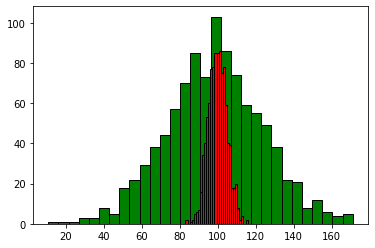

Within +/1 stdev: 68.60%
Within +/2 stdev: 96.20%
Within +/3 stdev: 99.70%


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# consistent values
mean = 100
num_samples = 1000

# large variance, large standard deviation
stdev = 25
large_stdev = np.random.normal(mean, stdev, num_samples) # mean, stdev, num_samples
plt.hist(large_stdev, bins=30, edgecolor="black", facecolor="green")

# small variance, small standard deviation
stdev = 5
small_stdev = np.random.normal(mean, stdev, num_samples) # mean, stdev, num_samples
plt.hist(small_stdev, bins=30, edgecolor="black", facecolor="red")
plt.show()

# test the empirical rule
within_1stdev = 0
within_2stdev = 0
within_3stdev = 0

for value in small_stdev:
    if mean - 1 * stdev <= value <= mean + 1 * stdev:
        within_1stdev += 1
    if mean - 2 * stdev <= value <= mean + 2 * stdev:
        within_2stdev += 1
    if mean - 3 * stdev <= value <= mean + 3 * stdev:
        within_3stdev += 1
print("Within +/1 stdev: %.2f%%" %(within_1stdev / num_samples * 100))
print("Within +/2 stdev: %.2f%%" %(within_2stdev / num_samples * 100))
print("Within +/3 stdev: %.2f%%" %(within_3stdev / num_samples * 100))

## The t-distribution
Here is a great introduction to the t-distribution from [JMP](https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/t-distribution.html)

<img src="https://github.com/GonzagaCPSC222/U5-Statistically-Analyzing-Data/raw/master/figures/intro_t_distribution.png" width="400">

<img src="https://github.com/GonzagaCPSC222/U5-Statistically-Analyzing-Data/raw/master/figures/intro_t_distribution_graph.png" width="400">